In [185]:
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,mean_squared_error
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import preprocessing
from sklearn.kernel_approximation import RBFSampler

Problem 1. Kernel SVM

(a) Linear kernel

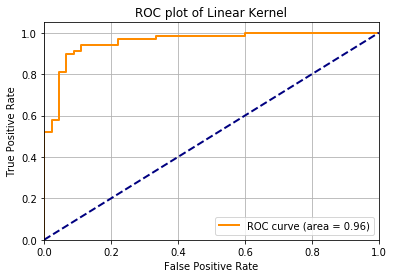

In [186]:
cancer = datasets.load_breast_cancer()
x = cancer.data
y = cancer.target
normalized_x = preprocessing.normalize(x)
#for multi-class classification, we should normalized the data to make a better model
x_train,x_test,y_train,y_test=train_test_split(normalized_x,y,test_size=0.2,random_state=np.random.seed(1234))
clf = SVC(kernel='linear',random_state = np.random.seed(1234),gamma = 'scale')
clf.fit(x_train,y_train)
result = clf.decision_function(x_test)
#I used decision_function instead of predict. According to the documentation, for multi-class classification, 
#decision_function is better than predict because this method provides a consistent interface with other classifiers
AUC = roc_auc_score(y_test, result)
fpr, tpr, thresholds = roc_curve(y_test, result)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot of Linear Kernel')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

(b) Radial Basis Function (RBF) kernel

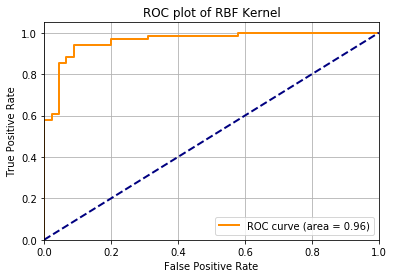

In [187]:
clf = SVC(kernel='rbf',random_state = np.random.seed(1234),gamma = 'scale')
clf.fit(x_train,y_train)
result = clf.decision_function(x_test)
AUC = roc_auc_score(y_test, result)
fpr, tpr, thresholds = roc_curve(y_test, result)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot of RBF Kernel')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

(c) Polynomial kernel of degree 5

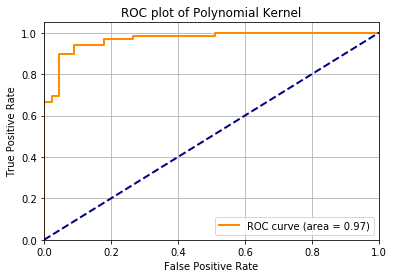

In [188]:
clf = SVC(kernel='poly',degree = 5, random_state = np.random.seed(1234),gamma='scale')
clf.fit(x_train,y_train)
result = clf.decision_function(x_test)
AUC = roc_auc_score(y_test, result)
fpr, tpr, thresholds = roc_curve(y_test, result)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot of Polynomial Kernel')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Problem 2. Kernel logistic regression

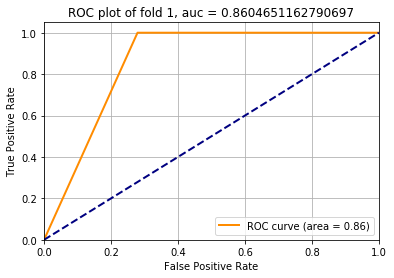

The AUC of fold 1 is 0.8604651162790697


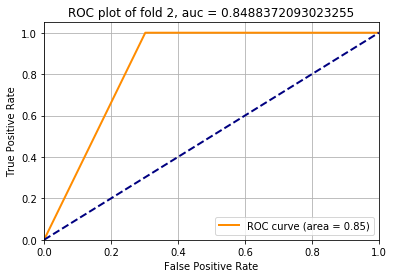

The AUC of fold 2 is 0.8488372093023255


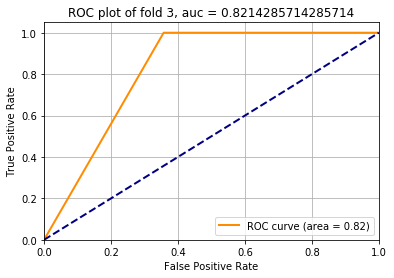

The AUC of fold 3 is 0.8214285714285714


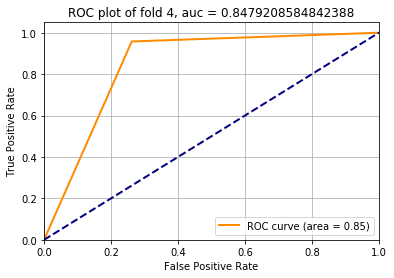

The AUC of fold 4 is 0.8479208584842388


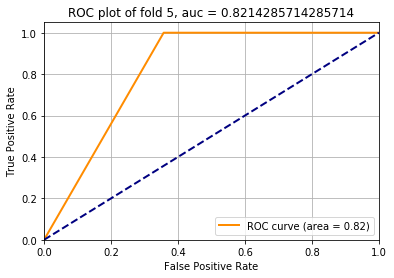

The AUC of fold 5 is 0.8214285714285714


In [189]:
rbf_feature = RBFSampler(gamma=1, n_components=30,random_state=np.random.seed(1234))
# n_components is the number of Monte Carlo samples per original feature, and I set this equals to the number of features
kernel_x = rbf_feature.fit_transform(normalized_x)
skf_cancer = StratifiedKFold(n_splits=5,random_state=np.random.seed(1234), shuffle=True)
#Since this data is using 20% of the data for testing, then the number of folds should be 5 rather than 10. I asked
#Dr. Honavar, it is a typo that should be 5-fold cross validation
clf = LogisticRegression(solver='lbfgs',random_state=np.random.seed(1234))
fold = 1
avg_AUC = []
for train_index, test_index in skf_cancer.split(kernel_x,y):
    x_cancer_train_fold, x_cancer_test_fold,y_cancer_train_fold, y_cancer_test_fold  = kernel_x[train_index], kernel_x[test_index],y[train_index], y[test_index]
    clf.fit(x_cancer_train_fold,y_cancer_train_fold)
    predict_cancer =  clf.predict(x_cancer_test_fold)
    AUC = roc_auc_score(y_cancer_test_fold, predict_cancer)
    fpr2, tpr2, thresholds2 = roc_curve(y_cancer_test_fold, predict_cancer)
    plt.figure()
    plt.plot(fpr2, tpr2, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC plot of fold {}, auc = {}'.format(fold, AUC))
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    print("The AUC of fold",fold,"is",AUC)
    avg_AUC.append(AUC)
    fold = fold + 1

In [190]:
print('the average of AUC of 5-fold cross validation is ',np.mean(avg_AUC))

the average of AUC of 5-fold cross validation is  0.8400160653845553


Problem 3. Soft-Margin Kernel SVM

In [191]:
class soft_margin_kernel:
    def __init__(x,y,b=0,self,C=1,learning_rate=0.001,n_iter=1000,w=0,A=0):
        self.x = x
        self.C = C
        self.y = y
        self.learning_rate = learning_rate
        self.n_iter=n_iter
        self.b = b
        self.w = w
        self.A = A
    def kernelTrans(X, A, model): 
        m,n = shape(X) 
        K = mat(zeros((m,1))) 
        if model =='linear': 
            K = X * A.T 
        elif model =='rbf':
            for j in range(m): 
                deltaRow = X[j,:] - A 
                K[j] = deltaRow*deltaRow.T 
                K = exp(K/(-1*kTup[1]**2)) 
        elif model == 'poly':
            K = X * A.T 
            for j in range(m): 
                K[j] = K[j]**kTup[1] 
        return K
    def hinge_loss (self):
        return np.max(0,self.1-y*np.dot(self.x,self.w)+b)
    def loss_function(self):
        slack_term = hinge_loss(x,y).mean()*self.C
        cost_f = 0.5*np.sum(self.w**2)
        return cost_f+slack_term
    def derivative(self):
        I=np.where(self.y*np.dot(self.X,self.w)>=1,-1)[:,None]
        derivative = np.zeros(w.shape)
        
    def train(self):
        for i in range(self.n_iter):
            
    def predict(self,x):
        result = []
        for i in x:
            predict=1 if np.sign(i.dot(self.w))>=0 else -1
            result.append(predict)
        return np.array(result)
    
    #I tried my best to complete this, but the first part of soft-margin svm algorhithm, but it is so hard.

SyntaxError: invalid syntax (<ipython-input-191-55dd1dca43f6>, line 27)